# Impotant Modules

In [143]:
import warnings
from collections import namedtuple
from typing import Callable, Any, Optional, Tuple, List

import torch
import torch.nn.functional as F
from torch import nn
from torch import Tensor


In [144]:
import torchvision.models as models
import torchvision
import torch

In [145]:
import matplotlib.pyplot as plt
import numpy as np

In [146]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torch.utils.data import DataLoader


In [147]:
import importlib.machinery
import os

from torch.hub import _get_torch_home

from torch.hub import load_state_dict_from_url  

In [148]:
from torchvision import utils

# **Inception Model:**

---



In [149]:
def inception_v3(pretrained: bool = False, progress: bool = True, **kwargs: Any):
    return Inception3(**kwargs)

class Inception3(nn.Module):

    def __init__(
        self,
        num_classes: int = 1000,
        aux_logits: bool = True,
        transform_input: bool = False,
    ) -> None:
        super(Inception3, self).__init__()
        self.transform_input = transform_input

        self.Conv5x5 = BasicConv2d(3, 15, kernel_size=5,stride=2)


    def _transform_input(self, x: Tensor) -> Tensor:
        if self.transform_input:
            x_ch0 = torch.unsqueeze(x[:, 0], 1) * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x_ch1 = torch.unsqueeze(x[:, 1], 1) * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x_ch2 = torch.unsqueeze(x[:, 2], 1) * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
            x = torch.cat((x_ch0, x_ch1, x_ch2), 1)
        return x

    def _forward(self, x: Tensor) -> Tuple[Tensor, Optional[Tensor]]:
        # N x 3 x 299 x 299
        x = self.Conv5x5(x)
        print(x)
        return x
    def forward(self, x: Tensor):
        x = self._transform_input(x)
        x = self._forward(x)

        return x
        
         




class BasicConv2d(nn.Module):
      def __init__(
        self,
        in_channels: int,
        out_channels: int,
        **kwargs: Any
    ) -> None:
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

      def forward(self, x: Tensor) -> Tensor:
      
        x = self.conv(x)
        x = self.bn(x)
        print('Output of Convolution 5*5')

        y = x[0][0].detach().numpy()
        plt.imshow(y)
        plt.show()
        return F.relu(x, inplace=True)


    






# Model Import

---



In [150]:
inception = inception_v3(pretrained=True)

# Output Model

In [151]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [152]:
from PIL import Image
input_image = Image.open(filename)

In [153]:
np.array(input_image).shape

(1213, 1546, 3)

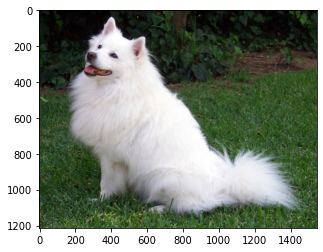

In [154]:
plt.imshow(input_image)

In [155]:

preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)

In [156]:

input_tensor.shape

torch.Size([3, 299, 299])

In [157]:
y = input_tensor.numpy().transpose(1,2,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


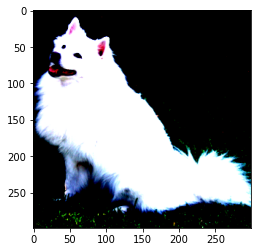

In [158]:
plt.imshow(y)

In [159]:
input_batch = input_tensor.unsqueeze(0) 

In [160]:
inception.eval()

Inception3(
  (Conv5x5): BasicConv2d(
    (conv): Conv2d(3, 15, kernel_size=(5, 5), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(15, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
)

Output of Convolution 5*5


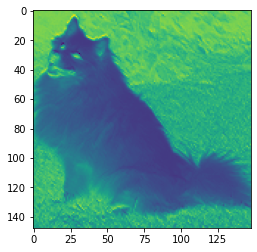

tensor([[[[0.7218, 0.7191, 0.6959,  ..., 0.6009, 0.6348, 0.6677],
          [0.6874, 0.7061, 0.7176,  ..., 0.5675, 0.6773, 0.6702],
          [0.7034, 0.7224, 0.7281,  ..., 0.4787, 0.6724, 0.7008],
          ...,
          [0.2749, 0.2834, 0.0708,  ..., 0.2611, 0.0335, 0.0979],
          [0.1481, 0.1133, 0.1667,  ..., 0.4909, 0.2935, 0.2346],
          [0.2480, 0.1476, 0.0346,  ..., 0.1407, 0.4197, 0.0466]],

         [[1.2957, 1.3101, 1.2907,  ..., 1.1588, 1.1901, 1.2891],
          [1.2590, 1.3026, 1.2861,  ..., 0.9665, 1.1866, 1.2874],
          [1.2849, 1.2867, 1.2753,  ..., 1.1130, 1.0518, 1.2559],
          ...,
          [0.4322, 0.4019, 0.4897,  ..., 0.4704, 0.5445, 0.3868],
          [0.4895, 0.4775, 0.4048,  ..., 0.5543, 0.7325, 0.4011],
          [0.5475, 0.5134, 0.5012,  ..., 0.6678, 0.1974, 0.5153]],

         [[1.9453, 1.9314, 1.9291,  ..., 1.5066, 1.6649, 1.7998],
          [1.9377, 1.9142, 1.9432,  ..., 1.5962, 1.6343, 1.8314],
          [1.9261, 1.9047, 1.9137,  ..., 1

In [161]:
output= inception(input_batch)
output_prob = torch.nn.Softmax(dim=1)
output_class = output_prob(output)
print(output_class)

#Output  2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


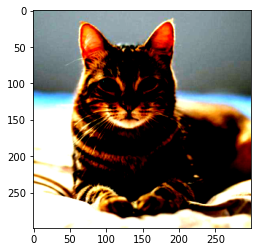

Output of Convolution 5*5


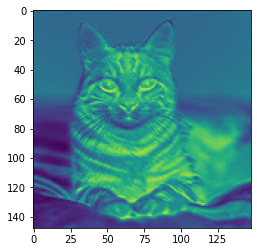

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [162]:
import urllib
url, filename = ("https://ichef.bbci.co.uk/news/976/cpsprodpb/12A9B/production/_111434467_gettyimages-1143489763.jpg", "cat.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_image = Image.open(filename)
input_tensor = preprocess(input_image)
y = input_tensor.numpy().transpose(1,2,0)
plt.imshow(y)
plt.show()
input_batch = input_tensor.unsqueeze(0) 
output = inception(input_batch)
output_prob = torch.nn.Softmax(dim=1)
output_class = output_prob(output)
print(output_class)

# Output 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


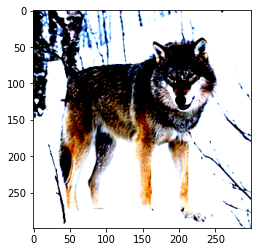

Output of Convolution 5*5


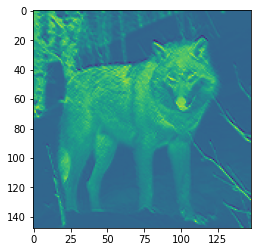

tensor([[[[0.3746, 0.3382, 0.1863,  ..., 0.0000, 0.0000, 0.0000],
          [0.4206, 0.4429, 0.4282,  ..., 0.0000, 0.0000, 0.0000],
          [0.2950, 0.2560, 0.2729,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.6191, 0.7097, 0.7631,  ..., 0.0000, 0.0000, 0.0000],
          [0.5675, 0.6806, 0.5687,  ..., 0.0000, 0.0000, 0.0000],
          [0.7052, 0.5223, 0.5293,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.9734, 1.0771, 0.3677,  ..., 0.0000, 0.0000, 0.0000],
          [1.2978, 1.0528, 0.9772,  ..., 0.0000, 0.0000, 0.0000],
          [1.0678, 0.9490, 0.8476,  ..., 0

In [163]:
import urllib
url, filename = ("https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Eurasian_wolf_2.jpg/330px-Eurasian_wolf_2.jpg", "wolf.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_image = Image.open(filename)
input_tensor = preprocess(input_image)
y = input_tensor.numpy().transpose(1,2,0)
plt.imshow(y)
plt.show()
input_batch = input_tensor.unsqueeze(0) 
output = inception(input_batch)
output_prob = torch.nn.Softmax(dim=1)
output_class = output_prob(output)
print(output_class)